In [1]:
using Distributions
using Plots; gr()

Plots.GRBackend()

In [2]:
using Random

In [3]:
Random.seed!(2022)

TaskLocalRNG()

In [13]:
exp_10 = rand(Exponential(10), 10)
exp_1 = rand(Exponential(1), 10)
exp_01 = rand(Exponential(0.1), 10)
bern_10 = rand(Bernoulli(), 10)

10-element Vector{Bool}:
 0
 1
 0
 1
 0
 1
 0
 1
 0
 0

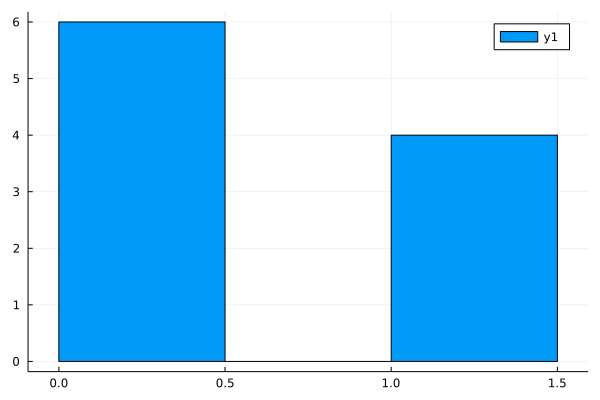

In [15]:
histogram(bern_10)

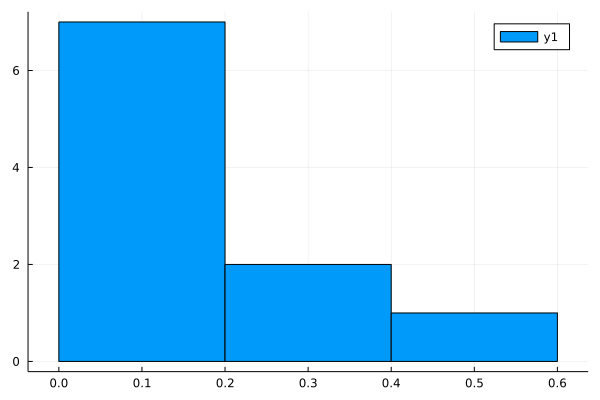

In [6]:
histogram(exp_01)

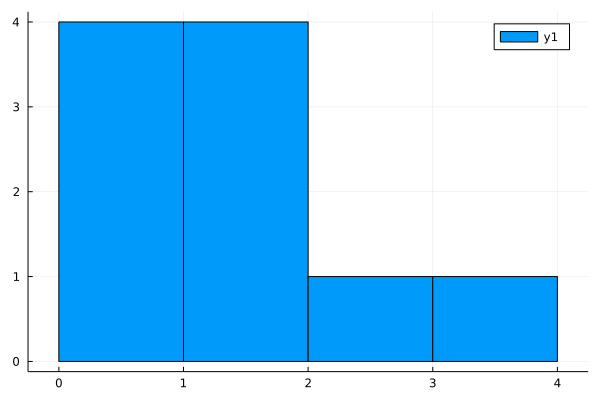

In [7]:
histogram(exp_1)

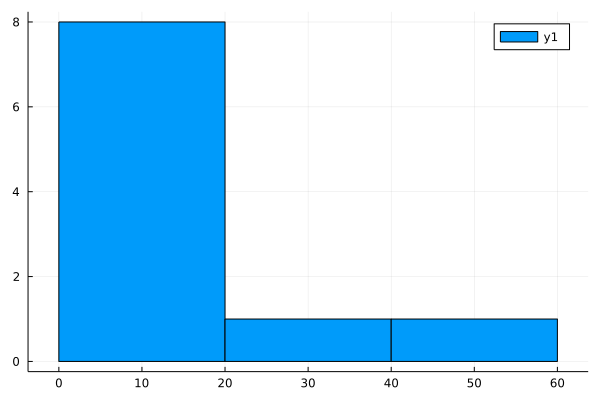

In [8]:
histogram(exp_10)

In [9]:
using StatsPlots

In [17]:
n = 10
sexp_10 = sum(exp_10)
sexp_1 = sum(exp_1)
sexp_01 = sum(exp_01)
sbern_10 = sum(bern_10)

4

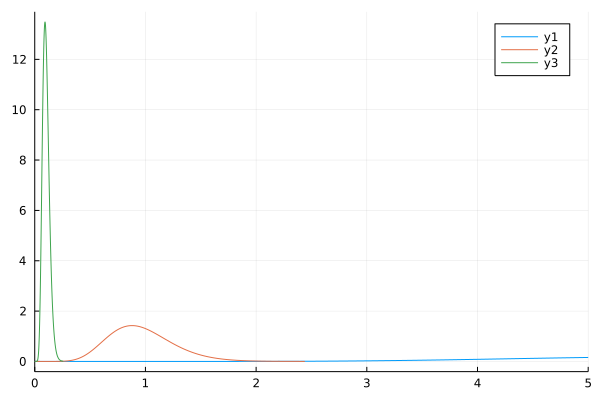

In [21]:
post_01L = Gamma(1 + n, (1 + sexp_01)^-1)
plot(post_01L, xlim= (0, 5))
post_1L = Gamma(1 + n, (1 + sexp_1)^-1)
plot!(post_1L)
post_10L = Gamma(1 + n, (1 + sexp_10)^-1)
plot!(post_10L)

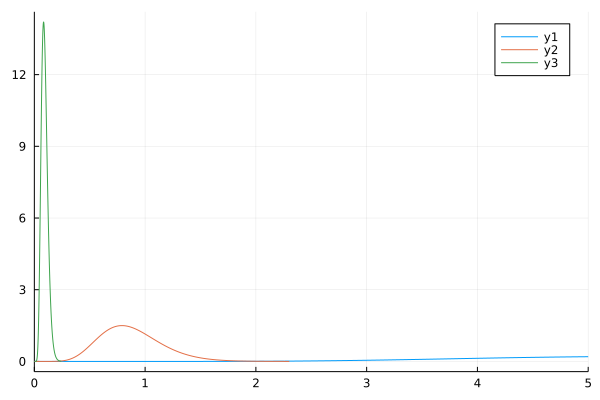

In [22]:
post_01J = Gamma(n, (1 + sexp_01)^-1)
plot(post_01J,  xlim= (0, 5))
post_1J = Gamma(n, (1 + sexp_1)^-1)
plot!(post_1J)
post_10J = Gamma(n, (1 + sexp_10)^-1)
plot!(post_10J)

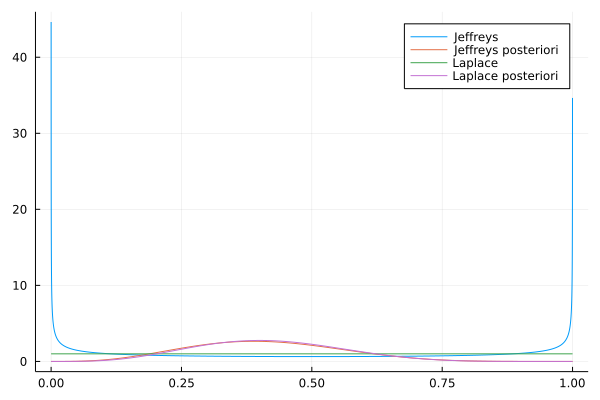

In [20]:
priori_1 = Beta(1/2, 1/2)
plot(priori_1, label="Jeffreys")
post_1 = Beta(1/2 + sbern_10, 1/2 + n - sbern_10)
plot!(post_1, label="Jeffreys posteriori")
priori_2 = Beta(1, 1)
plot!(priori_2, label="Laplace")
post_2 = Beta(1 + sbern_10, 1 + n - sbern_10)
plot!(post_2, label="Laplace posteriori")

In [23]:
Distribuicoes = [post_01L, post_1L, post_10L, post_01J, post_1J, post_10J, priori_1, post_1, priori_2, post_2]

10-element Vector{Distribution{Univariate, Continuous}}:
 Gamma{Float64}(α=11.0, θ=0.6264091397129031)
 Gamma{Float64}(α=11.0, θ=0.08789241614466103)
 Gamma{Float64}(α=11.0, θ=0.009277615642172218)
 Gamma{Float64}(α=10.0, θ=0.6264091397129031)
 Gamma{Float64}(α=10.0, θ=0.08789241614466103)
 Gamma{Float64}(α=10.0, θ=0.009277615642172218)
 Beta{Float64}(α=0.5, β=0.5)
 Beta{Float64}(α=4.5, β=6.5)
 Beta{Float64}(α=1.0, β=1.0)
 Beta{Float64}(α=5.0, β=7.0)

In [24]:
Medias = [mean(i) for i in Distribuicoes]
Variancias = [var(i) for i in Distribuicoes]

10-element Vector{Float64}:
 4.316272513474454
 0.084975844973209
 0.0009468156720426647
 3.9238841031585943
 0.07725076815746272
 0.0008607415200387862
 0.125
 0.020144628099173553
 0.08333333333333333
 0.018696581196581196

In [25]:
using DataFrames

In [26]:
df = DataFrame(Medias = Medias, Variancias = Variancias)

,Medias,Variancias
,Float64,Float64
1,6.8905,4.31627
2,0.966817,0.0849758
3,0.102054,0.000946816
4,6.26409,3.92388
5,0.878924,0.0772508
6,0.0927762,0.000860742
7,0.5,0.125
8,0.409091,0.0201446
9,0.5,0.0833333
